<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/ml_workflow_with_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workflow - Diabetes Data Set

- From [Machine Learning Workflow on Diabetes Data](https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8) on [towardsdatascience.com](https://towardsdatascience.com) by [Lahiru Liyanapathirana](https://towardsdatascience.com/@lahiru.tjay)

> *“Machine learning in a medical setting can help enhance medical diagnosis dramatically.”*

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.



# Everyone Has a Workflow!


## Microsoft Azure

<figure>
  <center>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/ml_pipeline_azure.png?raw=1" />
  <figcaption><a src="https://docs.microsoft.com/en-us/azure/machine-learning/service/concept-ml-pipelines">Microsoft</a>'s Azure ML workflow</figcaption>
  </center>
</figure>

## Amazon AWS SageMaker

<figure>
  <center>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/ml_pipeline_aws.gif?raw=1" />
  <figcaption><a src="https://aws.amazon.com/blogs/machine-learning/build-end-to-end-machine-learning-workflows-with-amazon-sagemaker-and-apache-airflow/">Amazon</a>'s AWS Sagemaker workflow</figcaption>
  </center>
</figure>


## IBM Watson

<figure>
  <center>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/ml_pipeline_watson.png?raw=1" />
  <figcaption><a src="https://www.esg-global.com/validation/esg-technical-validation-hybrid-multi-cloud-artificial-intelligence-ibm-watson-studio-and-watson-machine-learning">Watson</a>'s ML workflow</figcaption>
  </center>
</figure>

## Google Cloud ML

<figure>
  <center>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/ml_pipeline_google.png?raw=1" />
  <figcaption><a src="https://cloud.google.com/ml-engine/docs/ml-solutions-overview">Google</a>'s ML workflow</figcaption>
  </center>
</figure>


## What's our Workflow?

Every machine learning project goes through variations of this cycle.  

<figure>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/ml-workflow.png?raw=1" />
</figure>


This notebook will portray how data related to diabetes can be leveraged to predict if a person has diabetes or not. More specifically, this notebook will focus on how machine learning can be utilized to predict diseases such as diabetes. By the end of this notebook you will be able to understand concepts like data exploration, data cleansing, feature selection, model selection, model evaluation and apply them in a practical way.

## What is Diabetes ?

Diabetes is a disease which occurs when the blood glucose level becomes high, which ultimately leads to other health problems such as heart diseases, kidney disease, etc. Diabetes is caused mainly due to the consumption of highly processed foods, bad consumption habits, etc. According to [WHO](http://www.who.int/mediacentre/factsheets/fs312/en/), the number of people with diabetes has been increasing over the years.

## Data Set Information:

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**pima-indians-diabetes.csv** 767 rows x 9 columns



#### Inspiration:

- Some values are not in the range where they are supposed to be, should be treated as missing values.
- What kind of method is better to use to fill this type of missing value? What will further classification be like?
- Are there any sub-groups significantly more likely to have diabetes?

#### Sources

- [Description of Diabetes dataset](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv#pima-indians-diabetes.csv) on [Kaggle](https://www.kaggle.com/).
- [Description of Diabetes dataset (UCI)](https://data.world/data-society/pima-indians-diabetes-database) in 
- [Description of Diabetes dataset (UCI)](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) in 
 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

#### Fields:

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable: (1:tested positive for diabetes, 0: tested negative for diabetes)

### Feature ranges:

<figure>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/wf_diabetes_set.png?raw=1" align=”right”/>
</figure>

### Prerequisites

- Python 3.+
- Anaconda (Scikit Learn, Numpy, Pandas, Matplotlib, Seaborn)
- Jupyter Notebook
- Basic understanding of supervised machine learning methods : specifically classification

## Phase 0 — Data Preparation

As a Data Scientist the most tedious task which we encounter is the acquiring and the preparation of a data set. Even though there is an abundance of data in this era, it is still hard to find a suitable data set which suits the problem you are trying to tackle. If there aren’t any suitable data sets to be found, you might have to create your own.

In this tutorial we aren’t going to create our own data set, instead we will be using an existing data set called the **“Pima Indians Diabetes Database”** provided by the **UCI Machine Learning Repository** (a famous repository for machine learning data sets). We will be performing the machine learning workflow with the Diabetes Data set described above.

## Phase 1 — Data Exploration

When encountered with a data set, first we should analyse and **“get to know”** the data set. This step is necessary to familiarize with the data, to gain some understanding about the potential features and to see if data cleaning is needed. This [EDA (Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is a key data science component of most machine learning applications.

First we will import the necessary libraries and import our data set to the Jupyter notebook. We can observe the mentioned columns in the data set.

In [0]:
class Context:
    DATA = 'https://raw.githubusercontent.com/jfogarty/machine-learning-intro-workshop/master/data/'

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv(Context.DATA + 'diabetes.csv')

> Important: It should be noted that the above data set contains only limited features, where as in reality numerous features come into play.

We can examine the data set using the [pandas DataFrame ‘head‘](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method:

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can find the dimensions of the data set using the [pandas DataFrame ‘shape’](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape) attribute.

In [4]:
print(f"Diabetes data set dimensions : {diabetes.shape}")

Diabetes data set dimensions : (768, 9)


We can observe that the data set contains 768 rows and 9 columns. **‘Outcome’** is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means the person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non diabetic) and 268 as 1 (diabetic).

In [5]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### Visualization

Visualization of data is an imperative aspect of data science. It helps to understand data and also to explain the data to another person. Python has several interesting visualization libraries such as Matplotlib, Seaborn, etc.
In this tutorial we will use pandas visualization, which is built on top of matplotlib, to find the data distribution of the features.

We can use the [pandas DataFrameGroupBy ‘hist‘](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.hist.html?highlight=hist#pandas.core.groupby.DataFrameGroupBy.hist) method to draw histograms for the two responses separately. (The images are not displayed here.)

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

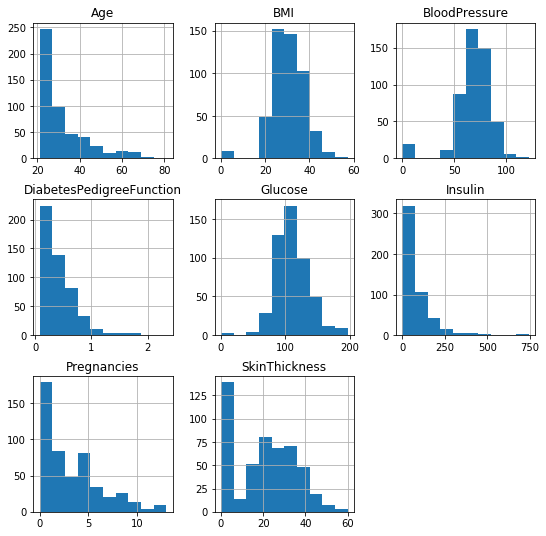

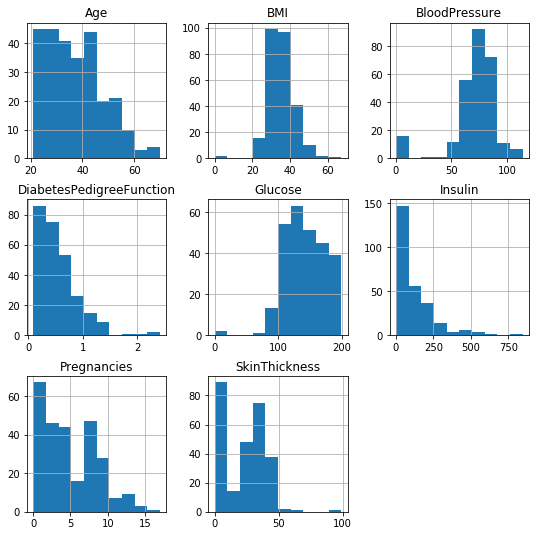

In [6]:
#@title
diabetes.groupby('Outcome').hist(figsize=(9, 9))

## Phase 2 — Data Cleaning

Next phase of the machine learning work flow is the data cleaning. Considered to be one of the crucial steps of the work flow, because it can make or break the model. There is a saying in machine learning **“Better data beats fancier algorithms”**, which suggests better data gives you better resulting models.
There are several factors to consider in the data cleaning process.

1. Duplicate or irrelevant observations.

2. Bad labeling of data, same category occurring multiple times.

3. Missing or null data points.

4. Unexpected outliers.

> Sorry, we won’t be discussing data cleaning procedure in detail in this tutorial.

Since we are using a standard data set, we can safely assume that factors 1, 2 are already dealt with. Unexpected outliers are either useful or potentially harmful.

## Missing or Null Data points

We can find any missing or null data points of the data set (if there are any) using the following pandas [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.isnull.html?highlight=isnull#pandas.Index.isnull) and [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html?highlight=isna#pandas.DataFrame.isna) functions.

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Unexpected Outliers

When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyse those outliers and determine what we can do about them.

**Blood pressure** : By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seem wrong because a living person cannot have diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.

In [9]:
print(f"- Total entries with 0 Blood Pressure: {diabetes[diabetes.BloodPressure == 0].shape[0]}")
Total :  35
diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count()

- Total entries with 0 Blood Pressure: 35


Outcome
0    19
1    16
Name: Age, dtype: int64

**Plasma glucose levels** : Even after fasting glucose level would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see **5 counts where the value is 0**.

In [10]:
print(f"- Total entries with 0 Glucose levels: {diabetes[diabetes.Glucose == 0].shape[0]}")
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

- Total entries with 0 Glucose levels: 5
Outcome
0    3
1    2
Name: Age, dtype: int64


**Skin Fold Thickness** : For normal people skin fold thickness can’t be less than 10 mm let alone zero. Total **count where skin fold is 0 : 227**.

In [11]:
print(f"- Total entries with 0 Skin fold thickness: {diabetes[diabetes.SkinThickness == 0].shape[0]}")
print(diabetes[diabetes.SkinThickness  == 0].groupby('Outcome')['Age'].count())

- Total entries with 0 Skin fold thickness: 227
Outcome
0    139
1     88
Name: Age, dtype: int64


**BMI** : Should not be 0 or close to zero unless the person is really underweight which could be life threatening.

In [12]:
print(f"- Total entries with 0 Body mass: {diabetes[diabetes.BMI == 0].shape[0]}")
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

- Total entries with 0 Body mass: 11
Outcome
0    9
1    2
Name: Age, dtype: int64


**Insulin** : In a rare situation a person can have zero insulin but by observing the data, we can find that there is a **total of 374 counts**.

In [13]:
print(f"- Total entries with 0 Insulin: {diabetes[diabetes.Insulin == 0].shape[0]}")
print(diabetes[diabetes.Insulin  == 0].groupby('Outcome')['Age'].count())

- Total entries with 0 Insulin: 374
Outcome
0    236
1    138
Name: Age, dtype: int64


#### Shortcut

You could just as well have written:

In [14]:
for f in ['BloodPressure', 'Glucose', 'SkinThickness', 'BMI', 'Insulin']:
    print(f"\n- Total entries with 0 {f}: {diabetes[diabetes[f] == 0].shape[0]}")
    print(diabetes[diabetes[f] == 0].groupby('Outcome')['Age'].count())


- Total entries with 0 BloodPressure: 35
Outcome
0    19
1    16
Name: Age, dtype: int64

- Total entries with 0 Glucose: 5
Outcome
0    3
1    2
Name: Age, dtype: int64

- Total entries with 0 SkinThickness: 227
Outcome
0    139
1     88
Name: Age, dtype: int64

- Total entries with 0 BMI: 11
Outcome
0    9
1    2
Name: Age, dtype: int64

- Total entries with 0 Insulin: 374
Outcome
0    236
1    138
Name: Age, dtype: int64


### Handling Invalid Data

Here are several ways to handle invalid data values :

1. Ignore/remove these cases : This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns have a lot of invalid points. But it might work for “BMI”, “glucose”, and “blood pressure” data points.

2. Put average/mean values : This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.

3. Avoid using features : It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but it's hard to predict that.

4. Add a new column ("skin thickness is valid") that indicates whether this feature is valid for this row.

By the end of the data cleaning process we have come to the conclusion that this given data set is incomplete. Since this is a demonstration for machine learning we will proceed with the given data with some minor adjustments.

We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [15]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


## Phase 3 — Feature Engineering

Feature engineering is the process of transforming the gathered data into features that better represent the problem that we are trying to solve, thereby improving the performance and accuracy of the model.

Feature engineering can create more input features from the existing features and also combine several features to produce more intuitive features to feed to the model.

> *“Feature engineering enables to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows to avoid overfitting the model despite providing many input features.”*

The domain of the problem we are trying to tackle requires lots of related features. Since the data set is already provided, and by examining the data we can’t further create or dismiss any data at this point. In the data set we have the following features.

> **‘Pregnancies’, ‘Glucose’, ‘Blood Pressure’, ‘Skin Thickness’, ‘Insulin’, ‘BMI’, ‘Diabetes Pedigree Function’, ‘Age’**

By a crude observation we can say that the ‘Skin Thickness’ is not an indicator of diabetes. But we can’t deny the fact that it is unusable at this point.

Therefore we will use all the features available. We separate the data set into features and the response that we are going to predict. We will assign the features to the **$X$ variable** and the response to the **$y$ variable**.

In [0]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

Generally feature engineering is performed before selecting the model. However for this tutorial we follow a different approach. Initially we will be utilizing all the features provided in the data set to the model, we will revisit feature engineering to discuss feature importance on the selected model.

[This article](https://elitedatascience.com/feature-engineering-best-practices) gives a very nice explanation about [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering).

## Phase 4 — Model Selection

Model selection or algorithm selection phase is the most exciting and the heart of machine learning. It is the phase where we select the model which performs best for the data set at hand.

First we will be calculating the **“Classification Accuracy (Testing Accuracy)”** of a given set of classification models with their default parameters to determine which model performs better with the diabetes data set.

We will import the necessary libraries to the notebook. We import 7 [sklearn] classifiers namely:  
- K-Nearest Neighbors
- Support Vector Classifier
- Logistic Regression
- Gaussian Naive Bayes
- Random Forest
- Gradient Boost

These are our contenders for the best classifier.

Look at the classifer comparisons at the end of this notebook for more.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

We will initialize the classifier models with their default parameters and add them to a model list.

In [0]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

> Generally models are trained with Scikit learn with something like:
- `knn = KNeighborsClassifier()`
- `knn.fit(X_train, y_train)`

## Evaluation Methods

It is a general practice to avoid training and testing on the same data. The reasons are that, the goal of the model is to predict **out-of-sample data**, and the model could be overly complex leading to **overfitting**. To avoid the aforementioned problems, there are two precautions.

- **1. Train/Test Split**

- **2. K-Fold Cross Validation**

We will import *“train_test_split”* for **train/test split** and *“cross_val_score”* for **k-fold cross validation**. 

*“accuracy_score”* is to evaluate the accuracy of the model in the train/test split method.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

We will use the above mentioned methods to find the best performing base models.

## Evaluate with Train/Test Split

This method splits the data set into two portions : a **training set** and a **test set**. 

The **training set** is used to train the model. And the **test set** is used to test the model, and evaluate the accuracy.

- **Cons** : Provides a **high-variance estimate** of out-of-sample accuracy

- **Pros** : But, train/test split is still useful because of its **flexibility and speed**

<figure>
  <center>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/wf_1.png?raw=1"/>
  </center>
</figure>

### Train/Test Split with Scikit Learn:

Next we can split the features and responses into train and test portions. We stratify ( process where each response class should be represented with equal proportions in each of the portions) the samples. [See train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)
X_train.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
513            2       91             62  ...  27.3                     0.525   22
645            2      157             74  ...  39.4                     0.134   30
305            2      120             76  ...  39.7                     0.215   29
373            2      105             58  ...  34.9                     0.225   25
179            5      130             82  ...  39.1                     0.956   37
136            0      100             70  ...  30.8                     0.597   21
688            1      140             74  ...  24.1                     0.828   23
219            5      112             66  ...  37.8                     0.261   41
462            8       74             70  ...  35.3                     0.705   39
406            4      115             72  ...  28.9                     0.376   46
762            9       89             62  ...  22.5    

Then we fit each model in a loop and calculate the accuracy of the respective model using the *“accuracy_score”*.

In [21]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.707182
4  GNB  0.734807
5   RF  0.767956
6   GB  0.773481


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Evaluate with K-Fold Cross Validation

This method splits the data set into **K equal partitions** (“folds”), then uses 1 fold as the **test set** and the union of the other folds as the **training set**.

Next the model is tested for accuracy. The process will follow the above steps K times, using a different fold as the testing set each time. The **average testing accuracy** of the process is the testing accuracy.

- **Cons** : Much slower than Train/Test split

- **Pros** : More accurate estimate of out-of-sample accuracy. More “efficient” use of data (every observation is used for both training and testing)

<figure>
  <center>
  <img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/wf_2.png?raw=1"/>
  </center>
</figure>

> ***This is the preferred method when computation capability is not scarce. We will be using this method from here on out.***

### K-Fold Cross Validation with Scikit Learn :

We will move forward with [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. *“cross_val_score”* provides its own training and accuracy calculation interface.

In [22]:
from sklearn.model_selection import KFold

names = []
scores = []
for name, model in models:   
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.697622
4  GNB  0.757021
5   RF  0.737881
6   GB  0.776427


### Grapically Compare the Accuracy Scores

We can plot the accuracy scores using seaborn

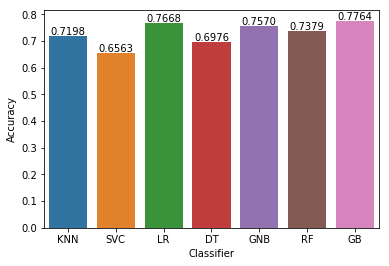

In [23]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

We can see the **Logistic Regression**, **Gaussian Naive Bayes**, **Random Forest** and **Gradient Boosting** have performed better than the rest.

 From the base level we can observe that the Logistic Regression performs better than the other algorithms.

### *At the baseline Logistic Regression managed to achieve a classification accuracy of about 77%, although sometimes Gradient Boosting will be better. This will be selected as the prime candidate for the next phases*.

## Summary

In this notebook we discussed the basic machine learning workflow steps such as data exploration, data cleaning steps, feature engineering basics and model selection using Scikit Learn library. Next, I will be discussing more about feature engineering, and hyperparameter tuning.

# Bonus Section! Classifier comparisons

A comparison of several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

- [Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) from the [scikit-learn docs](https://scikit-learn.org).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def evaluate_all_classifiers():
    h = .02  # step size in the mesh

    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
            "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
            "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
                make_circles(noise=0.2, factor=0.5, random_state=1),
                linearly_separable
                ]

    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                    edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    plt.tight_layout()
    plt.show()

In [0]:
evaluate_all_classifiers()

Note that the Linear SVM performed a bit worse than chance in the second row.

Note that for the 1st and 2nd rows, several classifiers might do better if the data was represented in terms of polar coordinates instead of cartesian coordinates.  Once again, better data (or data representations) can be better than fancier algorithms.

### End of notebook.